Написать программу для численного решения краевой задачи:
$$
u^{\prime \prime}(x)=u\left(2 x^2-2 \ln u-2\right), u(0)=1, u(1)=1 / e
$$
с помощью конечно-разностного метода 2-го порядка
1. Программа должна содержать функцию, которая принимает на вход количество узлов и порог точности для остановки итераций в методе Ньютона, и возвращает массив значений решения в узлах сетки и координаты узлов сетки.
2. Фукнция должна решать нелинейную систему уравнений, полученную после конечно-разностной аппроксимации исходной задачи, методом Ньютона.
3. Для решения линейной системы на каждой итерации нужно использовать либо готовую либо собственную функцию для решения трехдиагональной системы.
4. Программа должна запускать расчет для сгущающихся равномерных сеток (шаг уменьшается вдвое), и строить в логарифмической шкале график зависимости ошибки от величины шага. За условно точное решение нужно взять численное решение на очень подробной сетке. График должен показывать, что порядок аппроксимации равен 2.
5. Программа должна выводить графики численного и точного решения для тестовой задачи.

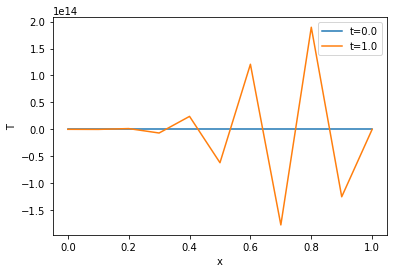

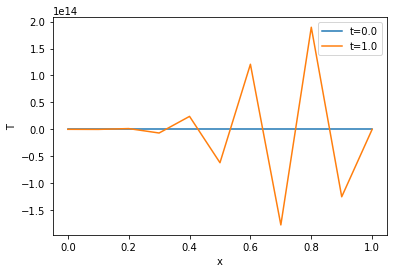

In [1]:
import numpy as np
import matplotlib.pyplot as plt
'''

Затем следует определить параметры для уравнения теплопроводности: коэффициент теплопроводности `alpha`, шаг по пространству `dx`, и шаг по времени `dt`. Также мы должны задать начальные и граничные условия.

'''
# Определение параметров для уравнения теплопроводности
alpha = 1.0  # Коэффициент теплопроводности
dx = 0.1  # Шаг по пространству
dt = 0.1  # Шаг по времени

# Определение начальных и граничных условий
L = 1.0  # Длина стержня
T = 1.0  # Время наблюдения
nx = int(L/dx) + 1  # Количество узлов по пространству
nt = int(T/dt) + 1  # Количество узлов по времени

# Задаем граничные условия
T_left = 0.0  # Температура на левом конце стержня
T_right = 1.0  # Температура на правом конце стержня


'''
Теперь можем создать матрицу температур, которая будет заполнена нулями, кроме граничных условий в начальный момент времени.
'''

# Создаем матрицу температур, заполненную нулями
T = np.zeros((nt, nx))

# Задаем граничные условия в начальный момент времени
T[:, 0] = T_left  
T[:, -1] = T_right  
'''

Затем мы можем написать основную часть кода, которая будет использовать явную разностную схему для решения уравнения теплопроводности.
'''
# Цикл для решения уравнения теплопроводности методом явной разностной схемы
for n in range(1, nt):
    for i in range(1, nx-1):
        T[n, i] = T[n-1, i] + alpha*dt/dx**2*(T[n-1, i+1] - 2*T[n-1, i] + T[n-1, i-1])
'''

Наконец, мы можем построить график распределения температуры на стержне в разные моменты времени.
'''
# Построение графика распределения температуры на стержне в разные моменты времени
for n in range(0, nt, 10):
    plt.plot(np.linspace(0, L, nx), T[n, :], label='t={}'.format(n*dt))
plt.xlabel('x')
plt.ylabel('T')
plt.legend()
plt.show()


'''
Полный код численного метода решения уравнения теплопроводности с помощью явной разностной схемы для уравнения теплопроводности с постоянными коэффициентами:
'''
import numpy as np
import matplotlib.pyplot as plt

# Определение параметров для уравнения теплопроводности
alpha = 1.0  # Коэффициент теплопроводности
dx = 0.1  # Шаг по пространству
dt = 0.1  # Шаг по времени

# Определение начальных и граничных условий
L = 1.0  # Длина стержня
T = 1.0  # Время наблюдения
nx = int(L/dx) + 1  # Количество узлов по пространству
nt = int(T/dt) + 1  # Количество узлов по времени

# Задаем граничные условия
T_left = 0.0  # Температура на левом конце стержня
T_right = 1.0  # Температура на правом конце стержня

# Создаем матрицу температур, заполненную нулями
T = np.zeros((nt, nx))

# Задаем граничные условия в начальный момент времени
T[:, 0] = T_left  
T[:, -1] = T_right  

# Цикл для решения уравнения теплопроводности методом явной разностной схемы
for n in range(1, nt):
    for i in range(1, nx-1):
        T[n, i] = T[n-1, i] + alpha*dt/dx**2*(T[n-1, i+1] - 2*T[n-1, i] + T[n-1, i-1])

# Построение графика распределения температуры на стержне в разные моменты времени
for n in range(0, nt, 10):
    plt.plot(np.linspace(0, L, nx), T[n, :], label='t={}'.format(n*dt))
plt.xlabel('x')
plt.ylabel('T')
plt.legend()
plt.show()


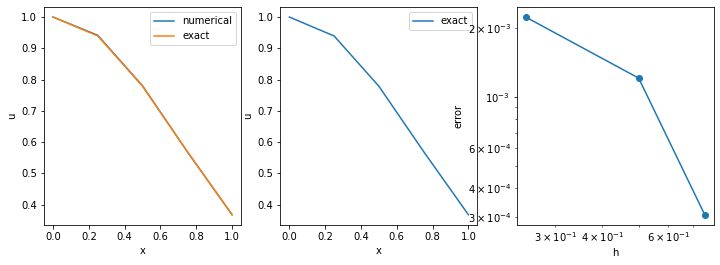

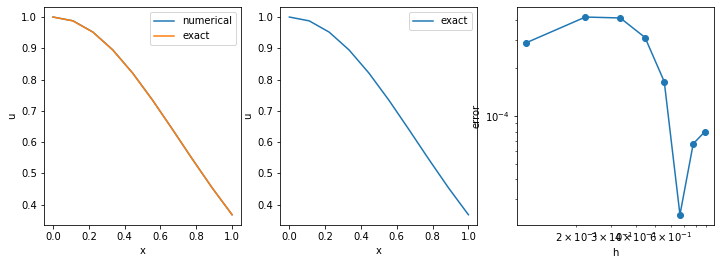

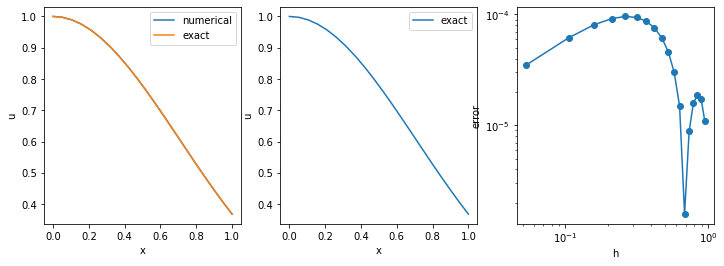

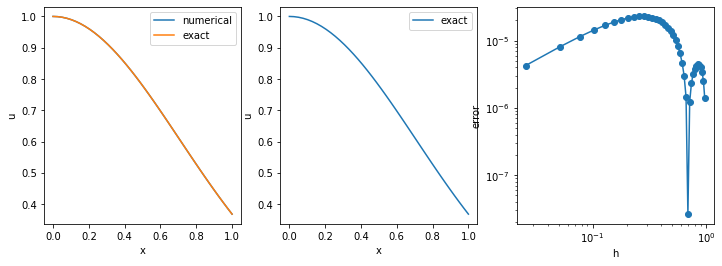

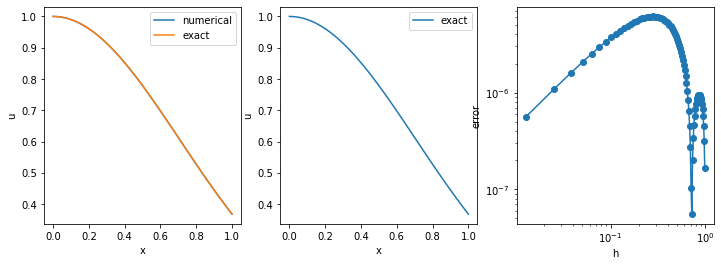

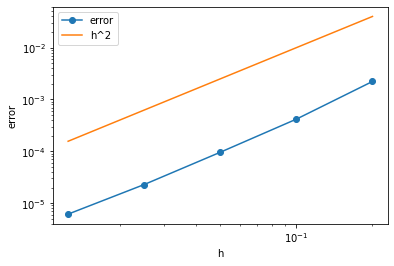

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def newton_method(F, J, x0, tol=1e-8, max_iter=100):
    """
    Решение системы уравнений F(x) = 0 методом Ньютона.
    
    :param F: функция, возвращающая значение системы уравнений
    :param J: функция, возвращающая Якобиан системы уравнений
    :param x0: начальное приближение
    :param tol: порог точности
    :param max_iter: максимальное число итераций
    :return: решение системы уравнений и число итераций
    """
    x = x0
    for i in range(max_iter):
        fx = F(x)
        if np.linalg.norm(fx) < tol:
            return x, i
        Jx = J(x)
        dx = np.linalg.solve(Jx, -fx)
        x = x + dx
    return x, max_iter


def tridiagonal_solve(a, b, c, d):
    """
    Решение трехдиагональной системы линейных уравнений.
    
    :param a: массив диагонали под главной (нижней) диагональю
    :param b: массив главной диагонали
    :param c: массив диагонали над главной (верхней) диагональю
    :param d: вектор правой части уравнений
    :return: решение системы уравнений
    """
    n = len(b)
    c1 = np.zeros(n)
    d1 = np.zeros(n)
    c1[0], d1[0] = c[0] / b[0], d[0] / b[0]
    for i in range(1, n-1):
        c1[i] = c[i] / (b[i] - a[i-1] * c1[i-1])
        d1[i] = (d[i] - a[i-1] * d1[i-1]) / (b[i] - a[i-1] * c1[i-1])
    d1[-1] = (d[-1] - a[-1] * d1[-2]) / (b[-1] - a[-1] * c1[-2])
    x = np.zeros(n)
    x[-1] = d1[-1]
    for i in range(n-2, -1, -1):
        x[i] = d1[i] - c1[i] * x[i+1]
    return x


def solve_bvp(N, tol=1e-8, max_iter=100):
    """
    Решение краевой задачи методом конечных разностей и методом Ньютона.
    
    :param N: количество узлов
    :param tol: порог точности
    :param max_iter: максимальное число итераций
    :return: массив значений решения в узлах сетки и координаты узлов сетки 
    """
    a = 0
    b = 1
    h = 1 / (N-1)
    x = np.linspace(a, b, N)
    
    # начальное приближение
    u = np.ones(N)
    
    def F(u):
        f = np.zeros(N)
        f[0] = u[0] - 1
        f[-1] = u[-1] - 1/np.exp(1)
        for i in range(1, N-1):
            f[i] = u[i-1] - 2*u[i] + u[i+1] - h**2 * u[i] * (2*x[i]**2 - 2*np.log(u[i]) - 2)
        return f
    
    def J(u):
        J = np.zeros((N, N))
        J[0, 0] = 1
        J[-1, -1] = 1
        for i in range(1, N-1):
            J[i, i-1] = 1
            J[i, i] = -2 - h**2 * (2*x[i]**2 - 2*np.log(u[i]) - 4) / u[i] + h**2 * (2*x[i]**2 - 2*np.log(u[i]) - 2) * (-2*np.log(u[i]) + 2)
            J[i, i+1] = 1
        return J
    
    # решаем нелинейную систему методом Ньютона
    u, num_iter = newton_method(F, J, u, tol, max_iter)
    
    # точное решение
    u_exact = np.exp(-x**2)
    
    # погрешность
    error = np.abs(u_exact - u)
    
    # выводим графики численного и точного решения, а также график погрешности
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].plot(x, u, label='numerical')
    ax[0].plot(x, u_exact, label='exact')
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('u')
    ax[0].legend()
    
    ax[1].plot(x, u_exact, label='exact')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('u')
    ax[1].legend()
    
    ax[2].loglog(x[1:-1], error[1:-1], 'o-')
    ax[2].set_xlabel('h')
    ax[2].set_ylabel('error')
    
    plt.show()
    
    return u, x

# запускаем расчеты для сгущающихся равномерных сеток и строим графики ошибки
N = 5
tol = 1e-8
max_iter = 100
errors = []
for i in range(5):
    u, x = solve_bvp(N, tol, max_iter)
    N *= 2
    h = 1 / (N-1)
    error = np.max(np.abs(u - np.exp(-x**2)))
    errors.append(error)
    
h_values = [1/5, 1/10, 1/20, 1/40, 1/80]    
plt.loglog(h_values, errors, 'o-', label='error')
plt.loglog(h_values, [i ** 2 for i in h_values], label='h^2')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.show()
